# Sierra Boyera model
The Sierra Boyera reservoir is located within the municipalities of the towns of Belmez, Peñarroya-Pueblonuevo and Fuente Obejuna, in the province of Córdoba (Andalusia, Spain).

Its operation has 2 main objectives: water supply (both urban and agricultural uses) and recreational purposes.

<left><img src="images/Sierra Boyera.jpg" width = "600px"><left>

In [1]:
# Importing necessary libraries
import pandas as pd  # Pandas for data manipulation and analysis
import numpy as np   # NumPy for numerical computations
import matplotlib.pyplot as plt  # Matplotlib for plotting
from ipywidgets import interact # to create interactive elements and figures

## Characterisitics of the system

<left><img src="images/system_diagram.png" width = "600px"><left>

In [2]:
s_max = 41 # Maximum reservoir storage hm3
s_min = 3 # Minimum reservoir storage hm3
s_0 = 30 # Initial reservoir storage
area = 439 # catchment area km2

## Model inputs

### Precipitation
First we load the available rain data (Oct 2015 to Mar 2023)

In [3]:
rain_daily = pd.read_excel('data/rain.xlsx',index_col = 'date')

Then we **resample** the data from **daily to monthly** precipitation

In [9]:
rain_monthly = rain_daily.resample('ME').sum()
rain_monthly

,precipitation
date,
2015-10-31,49.4
2015-11-30,26.1
2015-12-31,7.5
2016-01-31,50.6
2016-02-29,15.0
...,...
2022-11-30,29.5
2022-12-31,63.0
2023-01-31,14.5


Let's plot the monthly precipitation

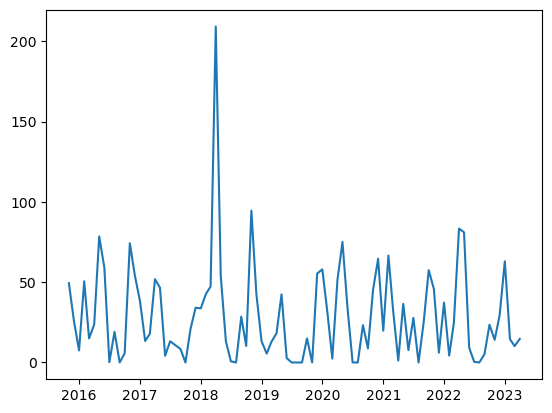

In [7]:
plt.plot(rain_monthly)

## Reservoir inflows

Now let's create a very simple model to transform monthly rainfall into monthly reservoir inflows, knowing that the runoff coefficient in the  catchment is **C = 0.06** (6% of the precipitation turns into runoff)

In [8]:
def rain_to_inflow(rain,C,area):
    rain = rain * 0.00001 # mm to hm
    area = area * 100 # km2 to hm2
    
    inflow = rain*area*C # hm3
    
    return inflow 

Now run the model and plot the reservoir inflows

In [11]:
C = 0.06
inflow = rain_to_inflow(rain_monthly['precipitation'],C,area)

**Let's compare the simulated inflow with observations (measured inflows).**

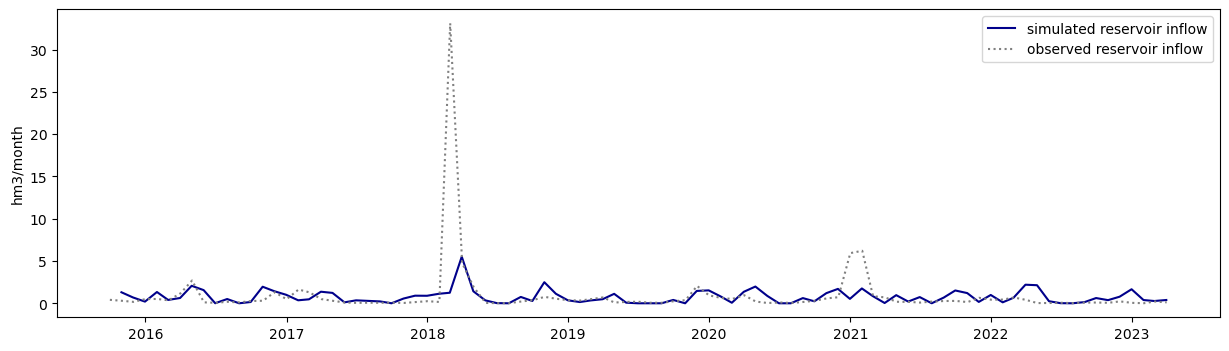

In [12]:
# We load the observed inflow data
inflow_obs_m3s = pd.read_excel('data/inflow_obs.xlsx',index_col = 'date') # in m3/s
inflow_obs = inflow_obs_m3s * 1e-6 * (3600 * 24 * 30) # in hm3/month
# Plot the simulated inflow vs observed inflow 
plt.figure(figsize = (15,4))
plt.plot(inflow, color = 'darkblue',label = 'simulated reservoir inflow')
plt.plot(inflow_obs, color = 'gray', linestyle = ':', label = 'observed reservoir inflow')
plt.ylabel('hm3/month')
plt.legend()
plt.show()

**Are the simulations any good? Can we improve the simulations by changing C? Let's try:**

In [13]:
@interact(C = (0,1,0.01))
def interactive_hydrological_model(C=0.06):
    
    inflow = rain_to_inflow(rain_monthly['precipitation'], C, area)
    
    # Plot the simulated inflow vs observed inflow 
    plt.figure(figsize = (15,4))
    plt.plot(inflow, color = 'darkblue',label = 'simulated reservoir inflow')
    plt.plot(inflow_obs, color = 'gray', linestyle = ':', label = 'observed reservoir inflow')
    plt.ylabel('hm3/month')
    plt.legend()
    plt.show()

interactive(children=(FloatSlider(value=0.06, description='C', max=1.0, step=0.01), Output()), _dom_classes=('…

## Evaporation
Load the monthly **evaporation** rates (**mm/month**): ***demand_agri.xlsx***

In [14]:
evap_month = pd.read_excel('data/evap.xlsx',index_col = 'month')

**Here we assume that the monthly evaporation changes within a year but does not change between years. Let's print the data on the screen:**

In [15]:
evap_month

,evap
month,
1,24.0
2,25.3
3,54.7
4,60.1
5,93.3
6,127.3
7,172.0
8,186.7
9,133.3


**Let's create a time series of the evaporation rate for each month from Oct 2015 to Mar 2023, based on** `evap_month` (the index column of the dataframe should correspond to the date)

In [19]:
T = len(inflow)
evap_ = np.zeros(T)
for t in range(T):
    evap_[t] = evap_month['evap'][rain_monthly.index[t].month]

In [21]:
evap_monthly = pd.DataFrame(data = evap_, index = rain_monthly.index, columns = ['evap'])

In [22]:
evap_monthly

,evap
date,
2015-10-31,65.7
2015-11-30,33.7
2015-12-31,23.3
2016-01-31,24.0
2016-02-29,25.3
...,...
2022-11-30,33.7
2022-12-31,23.3
2023-01-31,24.0


**Let's plot both the monthly evaporation rate (mm/month) and the precipitation (mm/month)**

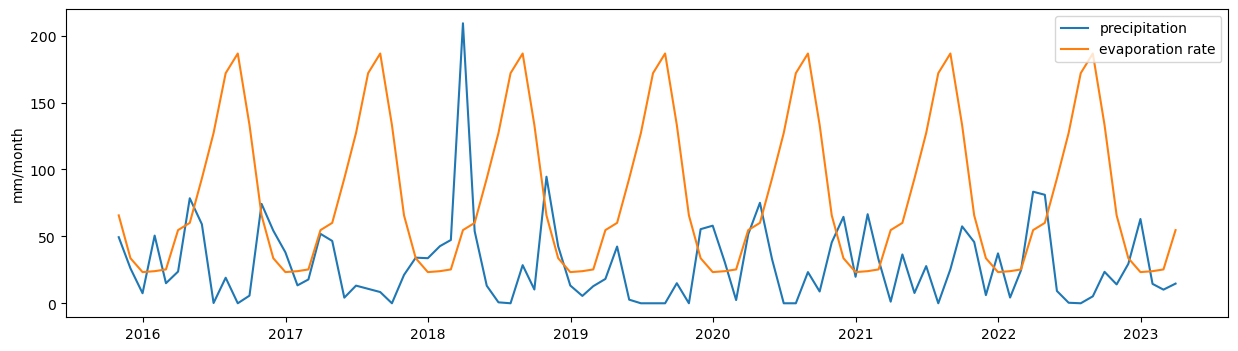

In [23]:
plt.figure(figsize = (15,4))
plt.plot(rain_monthly, label = 'precipitation')
plt.plot(evap_monthly, label = 'evaporation rate')
plt.ylabel('mm/month')
plt.legend()
plt.show()

#### Model to compute the volume of evaporation (mm to hm3)
- Relationship between the reservoir storage volume (hm3) and the corresponding reservoir surface area (**ha**) is as follows:

<left><img src="data/table - Vol vs Surf.png" width = "300px"><left>
    
Tip: use the function `np.interp`

In [ ]:
def res_evap():
    
    

    return evap_vol

**Question**: Why we cannot calculate the volume of evaporation a priori?

## Environmental flow
The **minimum environmental flows** are:
- Oct-Nov: **70 l/s**
- Dec-Apr: **140 l/s**
- May-Sep: **60 l/s**

Create a function to compute the **monthly** minimum environmental flow according to the conditions above. The function should transform the units from l/s to hm3/month: 

In [ ]:
def env_flow():

    
    
    return env_min

## Water demands
- Urban: **7.5 hm3/year**
- Agricultural: see file ***evap.xlsx*** Values in **hm3/month** 

In [ ]:
dem_urb = 7.5 / 12 # hm3/month
dem_agr = pd.read_excel('data/demand_agri.xlsx',index_col = 'month')

Here we assume that the monthly agricultural demand changes within a year but does not change between years. Let's print the data on the screen:

**Let's create a dataframe of time series of monthly demands (both urban and agriculture) for each month from Oct 2015 to Mar 2023, based on** `dem_urb` and `dem_agr` (the index column of the dataframe should correspond to the date)

## Operation rule
- If the reservoir storage >= 18 hm3, both urban and agricultural demands are met.
- If the reservoir storage (s) drops below **18hm3**, only **50% of agricultural demand is met**.

In [ ]:
def operation_rule():
    
    

    return demand

## Reservoir model
**With all this information, we would like to simulate the Sierra Boyera system from Oct 2015 until Mar 2023 and optimise its operation**.

In [ ]:
def res_sim(inflow,evap_rate,demand,s_0,s_max):
    
    """
    This is a model that simulates the operation of a single reservoir system. 
    It essentially consists of a water balance equation, 
    where the storage (s) at a future time step is predicted from the storage at the current time 
    by adding and subtracting the inflows and outflows that will occur during the temporal interval ahead

    The inputs of the model are:

    inflow = time series of reservoir inflows [hm3/month]
    evap_rate = evaporation rate from the reservoir surface area [mm/month]
    demand = time series of water demand [hm3/month]
    s_0 = initial reservoir storage [hm3]
    s_max = maximum storage capacity of the reservoir [hm3]
    
    And the outpus are:
    
    dates = time series of dates (monthly)
    s = reservoir storage [hm3]
    evap = volume of water evaporated from the reservoir surface [hm3/month]
    env = environmental compensation flow [hm3/month]
    spill = outflow through spillways [hm3/month]
    supply = regulated reservoir release for water supply [hm3/month]
    
    """
    dates = inflow.index
    
    T = len(dates) # number of time steps (months)
    # Declare output variables

    s = np.zeros(T+1) # reservoir storage in hm3

    spill = np.zeros(T) # spillage in hm3
    env = np.zeros(T) # environmental compensation flow
    evap = np.zeros(T) # evaporation volume
    supply = np.zeros(T) # supply releases
    
    # Initial storage
    s[0] = s_0

    for t in range(T):

        date = dates[t]
        evap[t] = res_evap(

    

    

        

        
    
    
    
    
        
    return dates,s[:-1],evap,env,spill,supply

**Let's run the model**

**Load the observed reservoir storage**

In [ ]:
s_obs = pd.read_excel('data/res_storage_obs.xlsx',index_col = 'date')

**Let's plot the outputs: in one figure compare the simulated vs observed reservoir storage and in another one plot the supply vs environmental flow vs evaporation** 

**Question:** does the simulation of the reservoir storage corresponds to the observations? Why?